# Crime Analysis

dataset from https://corgis-edu.github.io/corgis/csv/state_crime/, shows data overview and variable info

### Read datasets

In [1]:
 # Dependencies and Setup
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# read crime dataset
crime_data = pd.read_csv('https://corgis-edu.github.io/' \
            + 'corgis/datasets/csv/state_crime/' \
            + 'state_crime.csv')

crime_data

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Wyoming,2015,586107,179.8,1902.6,300.6,1500.9,222.1,10.1,2.7,...,21.3,1054,11151,1762,8797,1302,59,16,173,125
3111,Wyoming,2016,585501,1957.3,302.5,1518.2,136.6,244.2,195.7,3.4,...,10.1,11460,1771,8889,800,1430,1146,20,205,59
3112,Wyoming,2017,579315,1830.4,275.0,1421.0,134.5,237.5,176.4,2.6,...,13.1,10604,1593,8232,779,1376,1022,15,263,76
3113,Wyoming,2018,577737,1785.1,264.0,1375.9,145.2,212.2,150.6,2.3,...,17.3,10313,1525,7949,839,1226,870,13,243,100


In [3]:
# read happiness dataset 
happiness_path =  "Gallup2018.csv"
happiness_data = pd.read_csv(happiness_path)
happiness_data

,State,2018 sample size,Well-Being Index,Well-Being Index Rank,Career,Social,Financial,Community,Physical
0,Hawaii,502,64.6,1,1,1,1,4,4
1,Wyoming,219,64.2,2,3,18,6,1,3
2,Alaska,212,63.9,3,5,8,2,23,1
3,Montana,488,63.5,4,4,19,17,2,7
4,Utah,1214,63.4,5,2,4,13,9,14
5,Colorado,2316,63.4,6,11,6,10,11,2
6,Vermont,283,63.3,7,14,3,9,5,6
7,Delaware,386,62.9,8,26,2,4,22,10
8,South Dakota,402,62.7,9,6,21,12,6,27
9,North Dakota,340,62.7,10,7,31,3,7,33


### Clean/merge datasets

In [4]:
# rename/drop columns in crime dataset
crime_data = crime_data.rename(columns={'Data.Population':'Population',
                                      'Data.Totals.Property.All': 'Total Property Crimes', 
                                        'Data.Totals.Property.Burglary': 'Burglary',
                                       'Data.Totals.Property.Larceny': 'Larceny', 'Data.Totals.Property.Motor': 'Motor',
                                       'Data.Totals.Violent.All': 'Total Violent Crimes', 
                                        'Data.Totals.Violent.Assault': 'Assault',
                                       'Data.Totals.Violent.Murder': 'Murder', 'Data.Totals.Violent.Rape': 'Rape'
                                       , 'Data.Totals.Violent.Robbery': 'Robbery'})
crime_data = crime_data.drop(columns=['Data.Rates.Property.All','Data.Rates.Property.Burglary','Data.Rates.Property.Larceny'
                                     ,'Data.Rates.Property.Motor','Data.Rates.Violent.All','Data.Rates.Violent.Assault',
                                    'Data.Rates.Violent.Murder', 'Data.Rates.Violent.Rape','Data.Rates.Violent.Robbery'])
crime_data

,State,Year,Population,Total Property Crimes,Burglary,Larceny,Motor,Total Violent Crimes,Assault,Murder,Rape,Robbery
0,Alabama,1960,3266740,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,46290,15898,26713,3679,7260,5555,316,397,992
...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Wyoming,2015,586107,1054,11151,1762,8797,1302,59,16,173,125
3111,Wyoming,2016,585501,11460,1771,8889,800,1430,1146,20,205,59
3112,Wyoming,2017,579315,10604,1593,8232,779,1376,1022,15,263,76
3113,Wyoming,2018,577737,10313,1525,7949,839,1226,870,13,243,100


In [5]:
# subset crime data to only include 2018 stats
crime_data_2018 = crime_data[crime_data["Year"] == 2018]
crime_data_2018

,State,Year,Population,Total Property Crimes,Burglary,Larceny,Motor,Total Violent Crimes,Assault,Murder,Rape,Robbery
58,Alabama,2018,4887871,137700,28841,95747,13112,25399,18944,383,1996,4076
118,Alaska,2018,737438,24339,3979,16364,3996,6526,4391,47,1192,896
178,Arizona,2018,7171646,191974,31532,141303,19139,34058,23528,369,3638,6523
238,Arkansas,2018,3013825,87793,19193,61487,7113,16384,12378,216,2196,1594
298,California,2018,39557045,941618,164632,621775,155211,176982,105412,1739,15505,54326
358,Colorado,2018,5695564,152163,21371,109119,21673,22624,14547,210,4070,3797
418,Connecticut,2018,3572665,60055,7948,44724,7383,7411,4294,83,840,2194
478,Delaware,2018,967171,22481,3158,17847,1476,4097,2845,48,338,866
538,District of Columbia,2018,702455,30724,1788,26343,2593,6996,3971,160,450,2415
598,Florida,2018,21299325,486017,71933,372919,41165,81980,55551,1107,8438,16884


In [6]:
# combine happiness and crime 2018 datasets
combined_data = happiness_data.merge(crime_data_2018, how = 'outer', on='State')
combined_data

,State,2018 sample size,Well-Being Index,Well-Being Index Rank,Career,Social,Financial,Community,Physical,Year,Population,Total Property Crimes,Burglary,Larceny,Motor,Total Violent Crimes,Assault,Murder,Rape,Robbery
0,Hawaii,502.0,64.6,1.0,1.0,1.0,1.0,4.0,4.0,2018,1420491,40772,5631,29492,5649,3532,1925,36,625,946
1,Wyoming,219.0,64.2,2.0,3.0,18.0,6.0,1.0,3.0,2018,577737,10313,1525,7949,839,1226,870,13,243,100
2,Alaska,212.0,63.9,3.0,5.0,8.0,2.0,23.0,1.0,2018,737438,24339,3979,16364,3996,6526,4391,47,1192,896
3,Montana,488.0,63.5,4.0,4.0,19.0,17.0,2.0,7.0,2018,1062305,26518,3257,20465,2796,3974,3120,34,551,269
4,Utah,1214.0,63.4,5.0,2.0,4.0,13.0,9.0,14.0,2018,3161105,75156,9968,57460,7728,7368,4319,60,1753,1236
5,Colorado,2316.0,63.4,6.0,11.0,6.0,10.0,11.0,2.0,2018,5695564,152163,21371,109119,21673,22624,14547,210,4070,3797
6,Vermont,283.0,63.3,7.0,14.0,3.0,9.0,5.0,6.0,2018,626299,8036,1467,6316,253,1077,710,10,287,70
7,Delaware,386.0,62.9,8.0,26.0,2.0,4.0,22.0,10.0,2018,967171,22481,3158,17847,1476,4097,2845,48,338,866
8,South Dakota,402.0,62.7,9.0,6.0,21.0,12.0,6.0,27.0,2018,882235,15251,2571,11156,1524,3570,2682,12,614,262
9,North Dakota,340.0,62.7,10.0,7.0,31.0,3.0,7.0,33.0,2018,760077,15507,2724,11008,1775,2133,1560,18,397,158


In [7]:
# drop rows with NA (DC & US)


combined_data = combined_data.dropna()
combined_data

,State,2018 sample size,Well-Being Index,Well-Being Index Rank,Career,Social,Financial,Community,Physical,Year,Population,Total Property Crimes,Burglary,Larceny,Motor,Total Violent Crimes,Assault,Murder,Rape,Robbery
0,Hawaii,502.0,64.6,1.0,1.0,1.0,1.0,4.0,4.0,2018,1420491,40772,5631,29492,5649,3532,1925,36,625,946
1,Wyoming,219.0,64.2,2.0,3.0,18.0,6.0,1.0,3.0,2018,577737,10313,1525,7949,839,1226,870,13,243,100
2,Alaska,212.0,63.9,3.0,5.0,8.0,2.0,23.0,1.0,2018,737438,24339,3979,16364,3996,6526,4391,47,1192,896
3,Montana,488.0,63.5,4.0,4.0,19.0,17.0,2.0,7.0,2018,1062305,26518,3257,20465,2796,3974,3120,34,551,269
4,Utah,1214.0,63.4,5.0,2.0,4.0,13.0,9.0,14.0,2018,3161105,75156,9968,57460,7728,7368,4319,60,1753,1236
5,Colorado,2316.0,63.4,6.0,11.0,6.0,10.0,11.0,2.0,2018,5695564,152163,21371,109119,21673,22624,14547,210,4070,3797
6,Vermont,283.0,63.3,7.0,14.0,3.0,9.0,5.0,6.0,2018,626299,8036,1467,6316,253,1077,710,10,287,70
7,Delaware,386.0,62.9,8.0,26.0,2.0,4.0,22.0,10.0,2018,967171,22481,3158,17847,1476,4097,2845,48,338,866
8,South Dakota,402.0,62.7,9.0,6.0,21.0,12.0,6.0,27.0,2018,882235,15251,2571,11156,1524,3570,2682,12,614,262
9,North Dakota,340.0,62.7,10.0,7.0,31.0,3.0,7.0,33.0,2018,760077,15507,2724,11008,1775,2133,1560,18,397,158


# Exploratory Data Analysis

In [8]:
exploratory_df = combined_data.drop(columns=['Career', 'Social', 'Financial', 'Community', 'Physical'])
exploratory_df.describe()

,2018 sample size,Well-Being Index,Well-Being Index Rank,Year,Population,Total Property Crimes,Burglary,Larceny,Motor,Total Violent Crimes,Assault,Murder,Rape,Robbery
count,50.00000,50.000000,50.00000,50.0,5.000000e+01,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,2313.32000,61.466000,25.50000,2018.0,6.529300e+06,143306.420000,24567.22000,103814.240000,14924.960000,24761.380000,16068.78000,321.080000,2778.600000,5592.920000
std,2125.24642,1.488817,14.57738,0.0,7.371930e+06,168402.878968,29145.50867,118127.012494,23390.550221,31269.425051,19321.55076,362.528357,3153.628283,8871.043773
min,212.00000,57.000000,1.00000,2018.0,5.777370e+05,8036.000000,1467.00000,6316.000000,253.000000,1077.000000,710.00000,10.000000,243.000000,70.000000
25%,768.00000,60.650000,13.25000,2018.0,1.836691e+06,40287.500000,5423.25000,29620.500000,4396.750000,5752.000000,4032.25000,49.500000,803.250000,905.000000
50%,1664.00000,61.500000,25.50000,2018.0,4.564190e+06,101280.000000,17466.50000,70585.000000,10519.500000,17104.000000,10863.00000,204.000000,2040.500000,3216.500000
75%,2963.50000,62.425000,37.75000,2018.0,7.444605e+06,164503.250000,30717.25000,116016.750000,17227.250000,30148.500000,18819.50000,496.000000,2889.250000,6257.750000
max,10542.00000,64.600000,50.00000,2018.0,3.955704e+07,941618.000000,164632.00000,621775.000000,155211.000000,176982.000000,105412.00000,1739.000000,15505.000000,54326.000000


# Bar Graphs

Text(0, 0.5, 'Number of Burglaries')

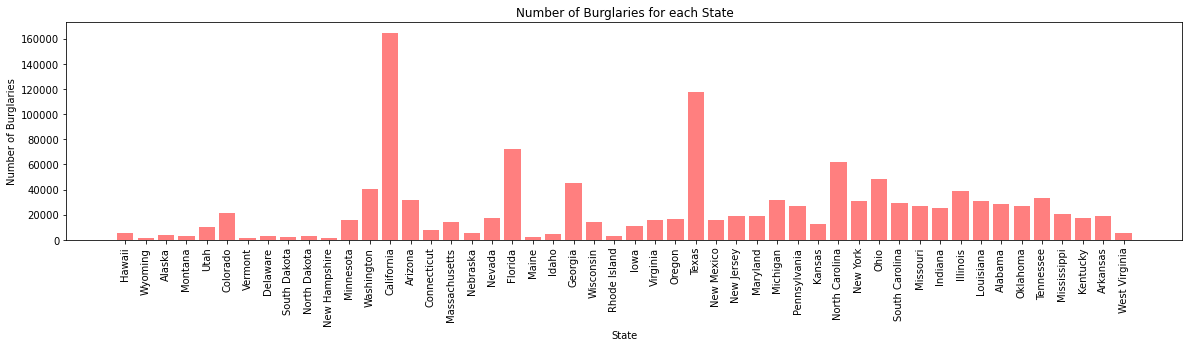

In [21]:
# Generate a bar plot for state and burglary


# Set x axis and tick locations
x_axis = np.arange(len(combined_data))
tick_locations = [value+0.4 for value in x_axis]

# plot bar graph
plt.figure(figsize=(20,4))
plt.bar(x_axis, combined_data["Burglary"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, combined_data["State"], rotation="vertical")

plt.title("Number of Burglaries for each State")
plt.xlabel("State")
plt.ylabel("Number of Burglaries")


Text(0, 0.5, 'Number of Larceny')

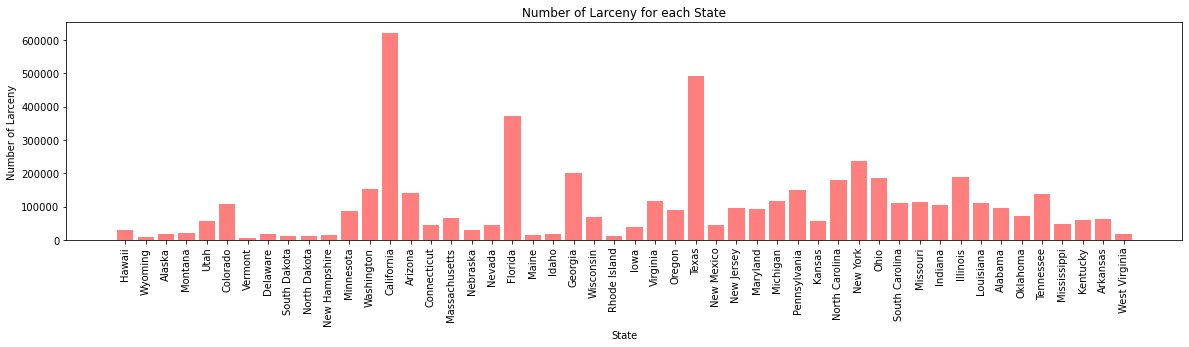

In [22]:
# Generate a bar plot for state and Larceny


# Set x axis and tick locations
x_axis = np.arange(len(combined_data))
tick_locations = [value+0.4 for value in x_axis]

# plot bar graph
plt.figure(figsize=(20,4))
plt.bar(x_axis, combined_data["Larceny"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, combined_data["State"], rotation="vertical")

plt.title("Number of Larceny for each State")
plt.xlabel("State")
plt.ylabel("Number of Larceny")

Text(0, 0.5, 'Number of Motor crimes')

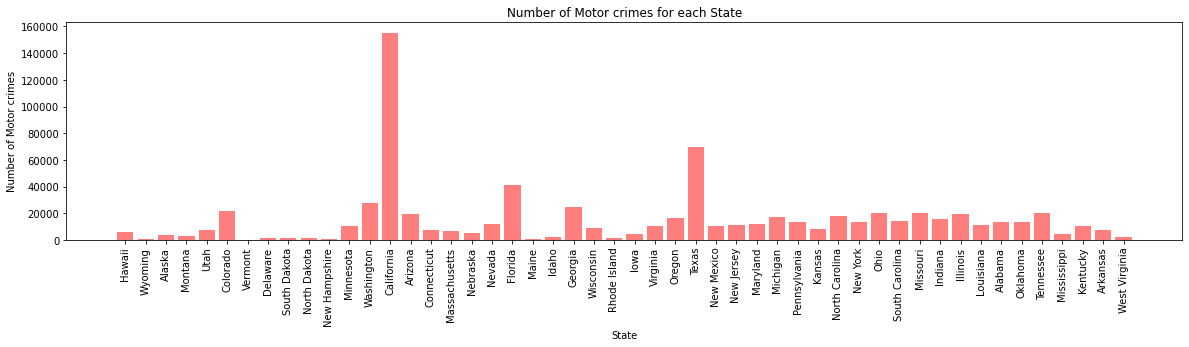

In [23]:
# Generate a bar plot for state and Motor


# Set x axis and tick locations
x_axis = np.arange(len(combined_data))
tick_locations = [value+0.4 for value in x_axis]

# plot bar graph
plt.figure(figsize=(20,4))
plt.bar(x_axis, combined_data["Motor"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, combined_data["State"], rotation="vertical")

plt.title("Number of Motor crimes for each State")
plt.xlabel("State")
plt.ylabel("Number of Motor crimes")

Text(0, 0.5, 'Number of Assault crimes')

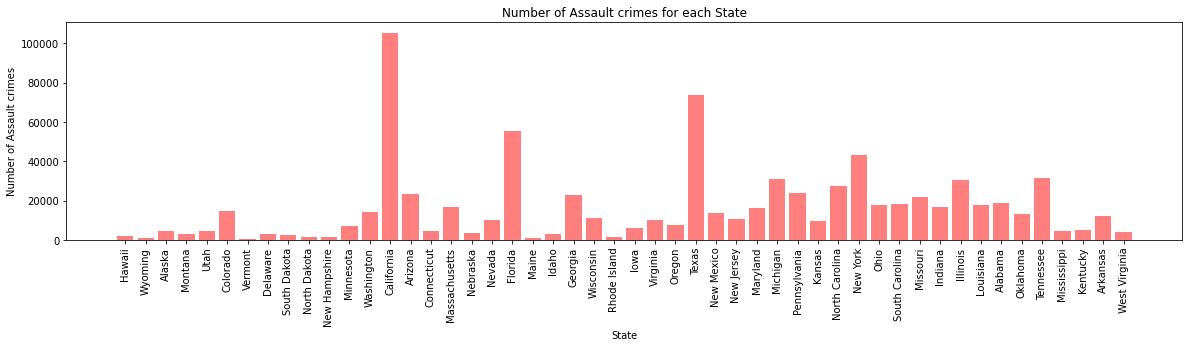

In [24]:
# Generate a bar plot for state and Assault


# Set x axis and tick locations
x_axis = np.arange(len(combined_data))
tick_locations = [value+0.4 for value in x_axis]

# plot bar graph
plt.figure(figsize=(20,4))
plt.bar(x_axis, combined_data["Assault"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, combined_data["State"], rotation="vertical")

plt.title("Number of Assault crimes for each State")
plt.xlabel("State")
plt.ylabel("Number of Assault crimes")

Text(0, 0.5, 'Number of Murder crimes')

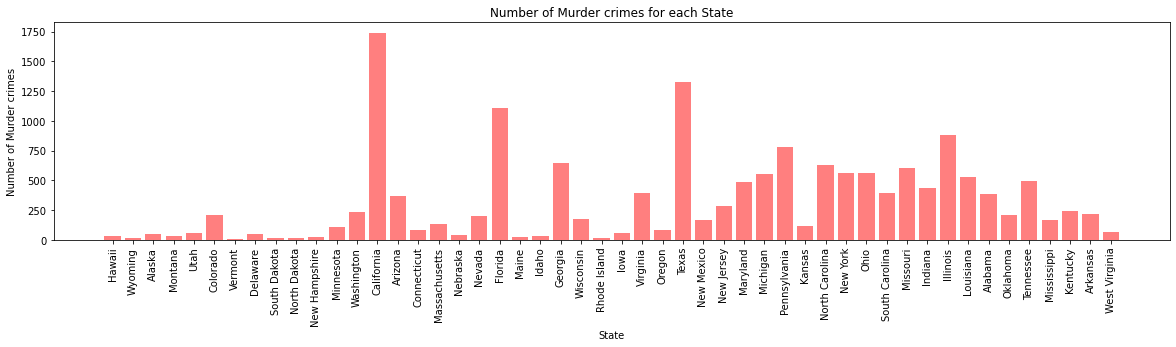

In [25]:
# Generate a bar plot for state and Murder


# Set x axis and tick locations
x_axis = np.arange(len(combined_data))
tick_locations = [value+0.4 for value in x_axis]

# plot bar graph
plt.figure(figsize=(20,4))
plt.bar(x_axis, combined_data["Murder"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, combined_data["State"], rotation="vertical")

plt.title("Number of Murder crimes for each State")
plt.xlabel("State")
plt.ylabel("Number of Murder crimes")

Text(0, 0.5, 'Number of Rape crimes')

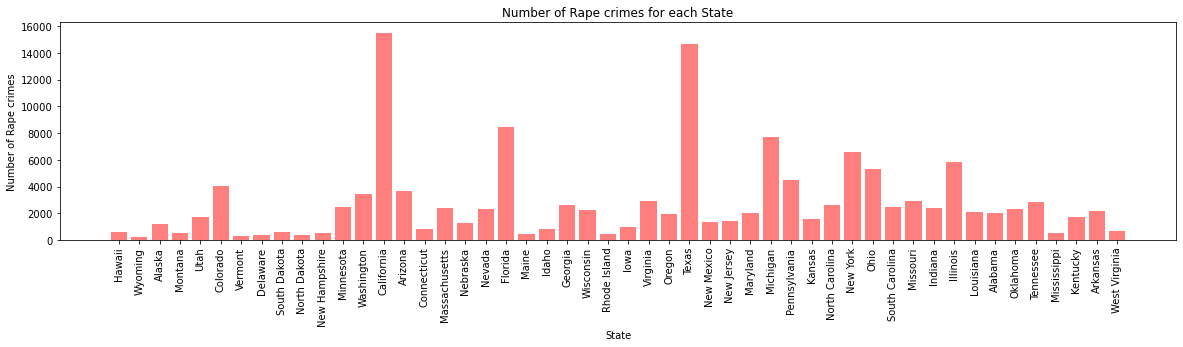

In [26]:
# Generate a bar plot for state and Rape


# Set x axis and tick locations
x_axis = np.arange(len(combined_data))
tick_locations = [value+0.4 for value in x_axis]

# plot bar graph
plt.figure(figsize=(20,4))
plt.bar(x_axis, combined_data["Rape"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, combined_data["State"], rotation="vertical")

plt.title("Number of Rape crimes for each State")
plt.xlabel("State")
plt.ylabel("Number of Rape crimes")

Text(0, 0.5, 'Number of Robbery crimes')

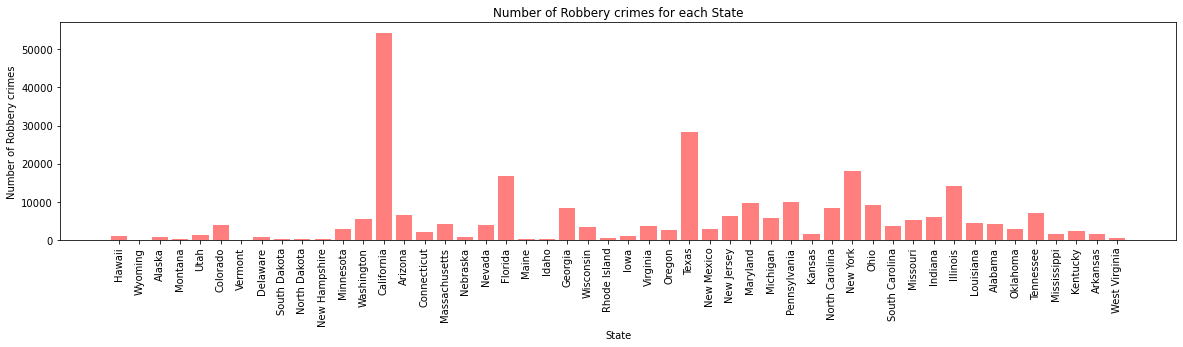

In [27]:
# Generate a bar plot for state and Robbery


# Set x axis and tick locations
x_axis = np.arange(len(combined_data))
tick_locations = [value+0.4 for value in x_axis]

# plot bar graph
plt.figure(figsize=(20,4))
plt.bar(x_axis, combined_data["Robbery"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, combined_data["State"], rotation="vertical")

plt.title("Number of Robbery crimes for each State")
plt.xlabel("State")
plt.ylabel("Number of Robbery crimes")

# Correlation

In [28]:
well_being = combined_data.iloc[:,2]
burglary = combined_data.iloc[:,12]
larceny = combined_data.iloc[:,13]
motor = combined_data.iloc[:,14]
assault = combined_data.iloc[:,16]
murder = combined_data.iloc[:,17]
rape = combined_data.iloc[:,18]
robbery = combined_data.iloc[:,19]

## Happiness vs Burglary

In [29]:
from scipy.stats import linregress

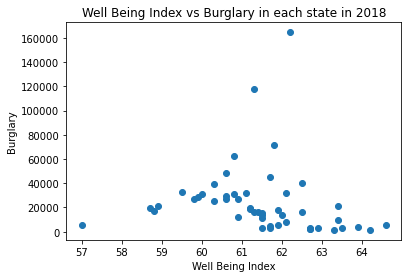

In [30]:
# happiness vs burglary

plt.scatter(well_being, burglary)


plt.xlabel('Well Being Index')
plt.ylabel('Burglary')
plt.title('Well Being Index vs Burglary in each state in 2018')

plt.show()

The r-squared is: 0.019688447962989835


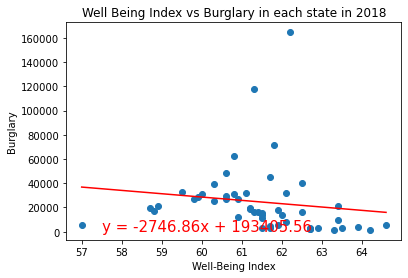

In [31]:
# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, burglary)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, burglary)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(57.5, 35),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('Burglary')
plt.title('Well Being Index vs Burglary in each state in 2018')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

### Happiness vs Larceny

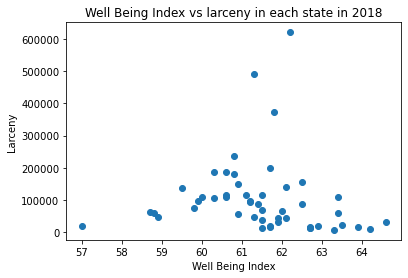

In [32]:
# happiness vs larceny

plt.scatter(well_being, larceny)


plt.xlabel('Well Being Index')
plt.ylabel('Larceny')
plt.title('Well Being Index vs larceny in each state in 2018')

plt.show()

The r-squared is: 0.009516927553307629


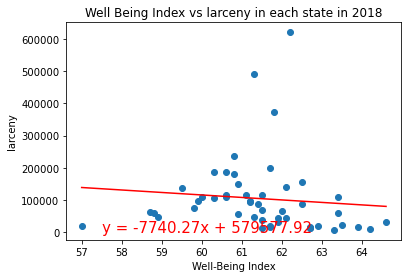

In [33]:
# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, larceny)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, larceny)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(57.5, 35),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('larceny')
plt.title('Well Being Index vs larceny in each state in 2018')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

### Happiness vs Motor

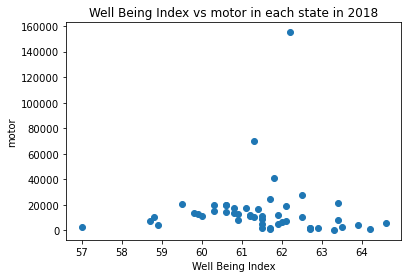

In [34]:
# happiness vs motor

plt.scatter(well_being, motor)


plt.xlabel('Well Being Index')
plt.ylabel('motor')
plt.title('Well Being Index vs motor in each state in 2018')

plt.show()

The r-squared is: 6.924307496824853e-05


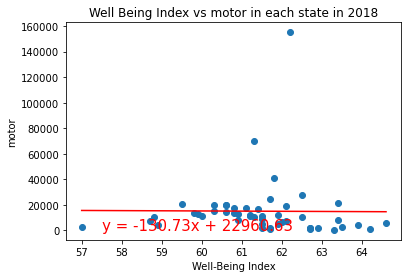

In [35]:
# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, motor)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, motor)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(57.5, 35),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('motor')
plt.title('Well Being Index vs motor in each state in 2018')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

### Happiness vs Assault

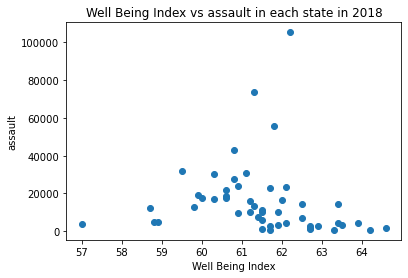

In [36]:
# happiness vs assault

plt.scatter(well_being, assault)


plt.xlabel('Well Being Index')
plt.ylabel('assault')
plt.title('Well Being Index vs assault in each state in 2018')

plt.show()

The r-squared is: 0.018340387043791182


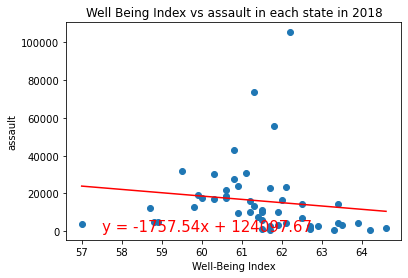

In [37]:
# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, assault)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, assault)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(57.5, 35),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('assault')
plt.title('Well Being Index vs assault in each state in 2018')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

### Happiness vs Murder

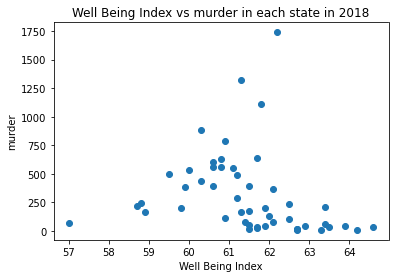

In [38]:
# happiness vs murder

plt.scatter(well_being, murder)


plt.xlabel('Well Being Index')
plt.ylabel('murder')
plt.title('Well Being Index vs murder in each state in 2018')

plt.show()

The r-squared is: 0.04951915684479039


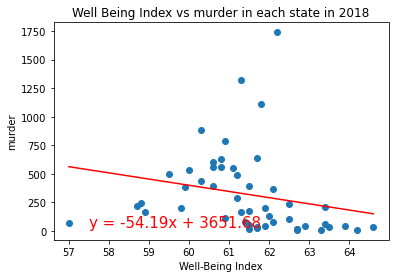

In [39]:
# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, murder)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, murder)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(57.5, 35),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('murder')
plt.title('Well Being Index vs murder in each state in 2018')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

### Happiness vs Rape

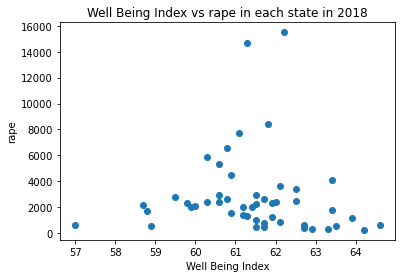

In [40]:
# happiness vs rape

plt.scatter(well_being, rape)


plt.xlabel('Well Being Index')
plt.ylabel('rape')
plt.title('Well Being Index vs rape in each state in 2018')

plt.show()

The r-squared is: 0.005755173459341


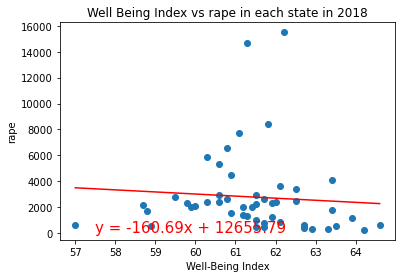

In [41]:
 # calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, rape)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, rape)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(57.5, 35),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('rape')
plt.title('Well Being Index vs rape in each state in 2018')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

## Happiness vs Robbery

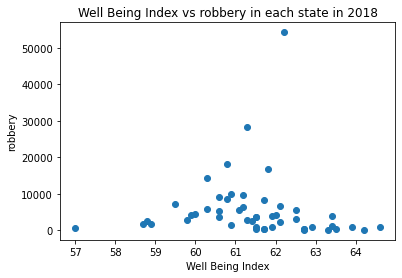

In [42]:
# happiness vs robbery

plt.scatter(well_being, robbery)


plt.xlabel('Well Being Index')
plt.ylabel('robbery')
plt.title('Well Being Index vs robbery in each state in 2018')

plt.show()

The r-squared is: 0.003804988615690691


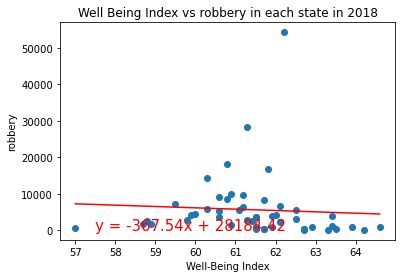

In [43]:
 # calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, robbery)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, robbery)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(57.5, 35),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('robbery')
plt.title('Well Being Index vs robbery in each state in 2018')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")